In [1]:
import pandas as pd
import matplotlib.pyplot as plt, matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn import svm
%matplotlib inline

In [2]:
labeled_images = pd.read_csv('train.csv')
images = labeled_images.iloc[0:10000,1:]
labels = labeled_images.iloc[0:10000,:1]
train_images, test_images,train_labels, test_labels = train_test_split(images, labels, train_size=0.8, random_state=0)

/Users/alex/anaconda/lib/python2.7/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


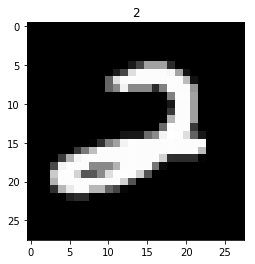

In [3]:
i=200
img=train_images.iloc[i].as_matrix()
img=img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train_labels.iloc[i,0])

(array([ 649.,    8.,    3.,   16.,    3.,    4.,    9.,    7.,   10.,   75.]),
 array([   0. ,   25.5,   51. ,   76.5,  102. ,  127.5,  153. ,  178.5,
         204. ,  229.5,  255. ]),
 <a list of 10 Patch objects>)

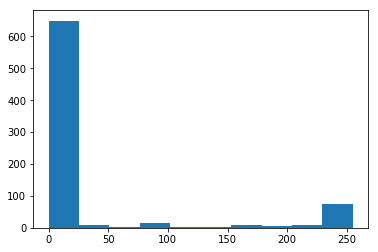

In [17]:
plt.hist(train_images.iloc[i])

In [4]:
clf = svm.SVC()
clf.fit(train_images, train_labels.values.ravel())
clf.score(test_images,test_labels)

0.1105

/Users/alex/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/alex/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:2366: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)
/Users/alex/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas

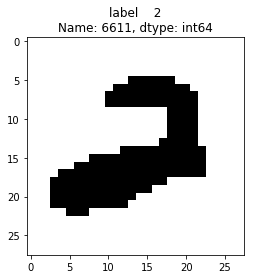

In [5]:
test_images[test_images>0]=1
train_images[train_images>0]=1

img=train_images.iloc[i].as_matrix().reshape((28,28))
plt.imshow(img,cmap='binary')
plt.title(train_labels.iloc[i])

In [ ]:
plt.hist(train_images.iloc[i])

In [8]:
clf = svm.SVC()
clf.fit(train_images, train_labels.values.ravel())
clf.score(test_images,test_labels)

0.91849999999999998

In [9]:
test_data=pd.read_csv('test.csv')
test_data[test_data>0]=1
results=clf.predict(test_data)

In [11]:
df = pd.DataFrame(results)
df.index+=1
df.index.name='ImageId'
df.columns=['Label']
df.to_csv('results.csv', header=True)